<a href="https://colab.research.google.com/github/syp2889/python25study/blob/main/03_01_k_%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 이번에는 겨울에 대방어철로 대방어 주문이 크게 늘어서
# MBC마켓에서 업계최초로 대방어를 무게 단위로 판매하려고 해요.
# 무게 단위로 판매를 하면 가격측정도 원활하고
# 고객도 합리적으로 판단을 할 수 있지요.
# 그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수도 있어요.

# 그래서 대방어의 무게를 재측정해야 해요.
# 다른 데이터는 정상범위가 있으니 예측할 수 있을까?
# 이렇게 예측하는 것을 "회귀" 라고 해요.
# 샘플 데이터가 필요하겠군!
# 외부에서 56개의 샘플을 받아서 처리해봅시다.
# 지도학습은 크게 2가지로 나누어집니다.

# 분류(2진분류) : from.sklearn.neighbors import KNeighborsClassifier (classifier가 분류고)
# 회귀 (예측 : 확률 (임의의 어떤 숫자로 예측)
#              : from sklearn.neighbors import KNeighborsRegressor)  (regressor가 회귀)
# 회귀 : 두 변수 사이에 상관관계를 분석하는 방법

In [1]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
# 차트에 한글처리용
!sudo apt-get install -y fonts-nanum # !sudo 가상머신 명령어 처리 (관리자권한)
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 설치 후 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,872 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125081 files and dire

In [1]:
# 대방어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 대방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 대방어의 무게 배열리스트

기초자료


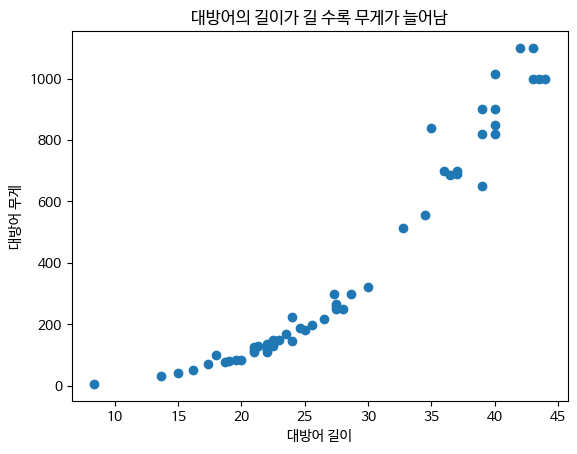

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic") # 한글처리
plt.scatter(perch_length, perch_weight)   # 대방어의 길이(x축), 대방어의 무게(y축)
plt.xlabel("대방어 길이")
plt.ylabel("대방어 무게")
print('기초자료')
plt.title('대방어의 길이가 길 수록 무게가 늘어남')
plt.show()

# 산점도를 그리고 나니 길이가 커짐에 따라 무게도 늘어남
# 이 데이터를 토대로 훈련(.fit)와 테스트(.score)를 진행해볼게요.

In [ ]:
# K-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측해요.
# k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단해요.
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택합니다.
# 타깃값 100,80,60을 더해 3으로 나눈 평균이 타깃 값으로 사용됩니다.

In [3]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
#

# stratify 사용하지 않음(분류용)>>정답파일이 무게 확율이기 때문에

# 사이킷 런의 train_test_split 함수를 사용해 훈련세트와 테스트 세트로 나눕니다.
# random_state=42 서로 같은 테스트를 위해 시드값을 제공해요.

# 사이킷 런에 사용할 훈련 세트는 2차원 배열을 사용해요.,
# perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 메서드 확용(4,)>>(2,2)

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape) # 현재 1차원 배열로 나오는데 이것을 억지로 2차원 배열 처리 해야한대요

(4,)


In [8]:
# 2차원 배열로 변환
test_array = test_array.reshape(2,2) # 억지로 2차원 배열 만드는 기법
print(test_array.shape)
# 전에는 2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용햇었지만
# 이번에는 특성이 1개로 수동으로 2차원 배열을 만들어야해요. >> 넘파이.reshape()를 활용
# {4,}>>{2,2}크기로 바꿔줍니다.

(2, 2)


In [9]:
print(test_array)

[[1 2]
 [3 4]]


In [10]:
# 입력데이터인 train _input과 test_input를 2차원 배열로 바꿔야해요.
# train_input (42,)>>(42,1)>>train_input.reshape(42,1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공해요. (-1)값을 넣으면 됩니다.

train_input = train_input.reshape(-1,1)  # -1 지정하면 원소 개수로 모두 채우라는 의미
test_input = test_input.reshape(-1,1)    # 1은 두번 째 크기를 1로 정합니다.
print(train_input.shape, test_input.shape) # -1를 사용하면 매번 원소의 크기를 외우지 않아도 돼요.

(42, 1) (14, 1)


In [13]:
# 훈련시작
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용 구현 클래스 (리그레스)

# from sklearn.neighbors import KNeighborsClassifier # 분류용

knr=KNeighborsRegressor() # 회귀용 객체 생성
#k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)# 회귀용으로 훈련
#        대방어길이  대방어무게

KNeighborsRegressor()

In [18]:
knr.score(test_input, test_target)
#  대방어 테스트길이, 테스트무게
# 분류의 경우는 테스트 세트에 있는 샘플을 정호가하게 분류 한 계수의 비율 (정확도)>>>예측값

# 회귀인 경우에는 평가를 "결정계수"라고 해요. "R^2"
# R^2 = 1 = ((타깃-예측)^2의 합) / ((타깃-평균)^2의 합)
# 타깃의 평균 정도를 예측하는 수준 >>> R^2는 0에 가까워지고, 예측이 타깃에 가까워지면 1에 가까워져요.
# 결과 99.28%로 예측 가능한 수준이네요.

0.992809406101064

In [17]:
knr.predict([[15]]) # 알고 싶은 값 출력하기 15cm >> 60g
# k최근접한 5개의 이웃에 대한 값을 99.28% 확률로 나온 결과 (60g)

array([60.])

In [19]:
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공해요.
# mean_absolute_error 절대값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error # 평균으로 절대값의 오차를 찾는 메서드

# 테스트 세트에 대한 예측(prediction)을 만듭니다.
test_prediction = knr.predict(test_input)

mae=mean_absolute_error(test_target, test_prediction)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.

print(mae)
# 19g 정도 타깃값과 다르게 나와요. (타깃과 예측한 값사이의 차이)

19.157142857142862


In [20]:
print(knr.score(train_input, train_target)) # 훈련한 모델을 사용해 훈련세트 점수를 확인해볼게요.
# 훈련한 점수를 평가해보면 96.98%정도 나와요.

0.9698823289099254


In [21]:
knr.score(test_input, test_target) # 테스트 세트로 평가를 둘러보면 99.28% 정도 나와요.

0.992809406101064

In [ ]:
# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어져요.
# 이 모델을 훈련세트와 테스트 세트에서 평가하면 두 값중에 어느 것이 높을까요?

# 보통 훈련세트의 점수가 조금 더 높게 나와요.
# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대적합이라고 합니다.
# 과소적합 : 훈련세트에서 테스트세트가 점수가 높거나 두 점수가 모두 낮은 경우

In [22]:
# 사이킷 런의 알고리즘 기본값을 3개로 조절해볼게요.
# 사이킷 런의 K-최근접이웃 기본값이 5인데 이것을 3으로 변경할게요
# 이웃의 갯수를 3으로 설정합니다.
knr.n_neighbors=3
# 모델을 다시 훈련합니다.
knr.fit(train_input, train_target) # 3개의 이웃용 생성 훈련
print(knr.score(train_input, train_target)) #훈련점수 보기 98.04%

0.9804899950518966


In [23]:
knr.predict([[15]]) # 알고싶은 값 출력 15cm>>>>>47.33333g
# 5개의 이웃을 참고하는 것(60.0)보다 3개를 참고하는 것이 더 좋은 결과가 나왔네요.

array([47.33333333])

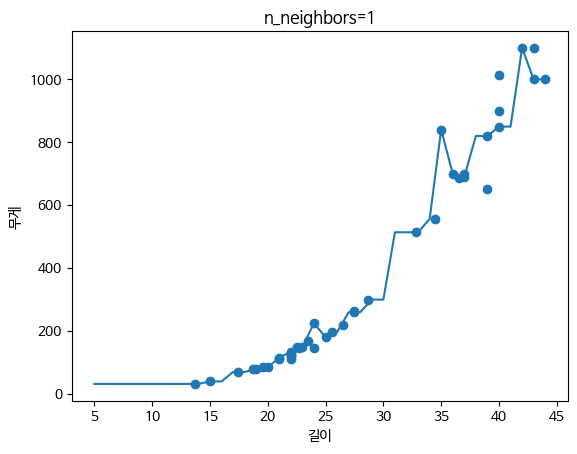

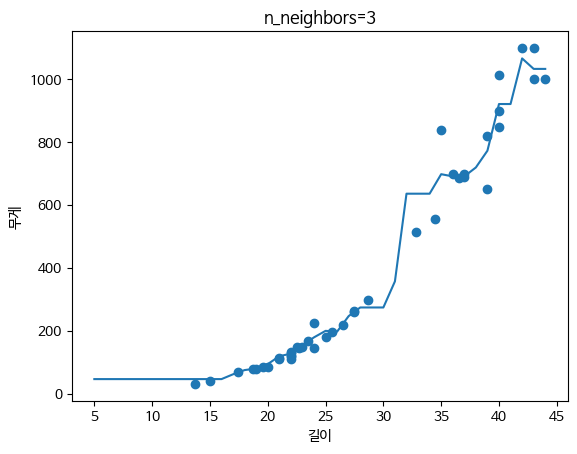

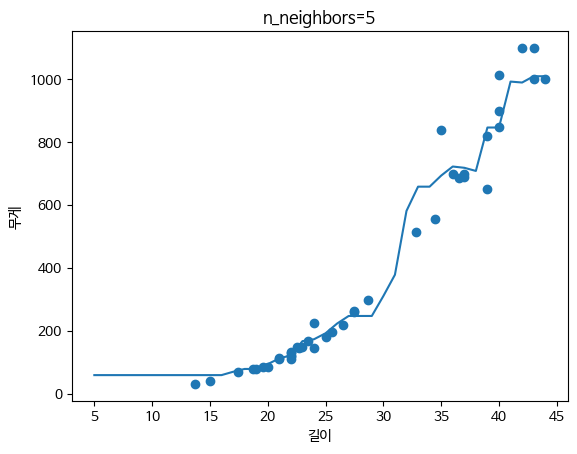

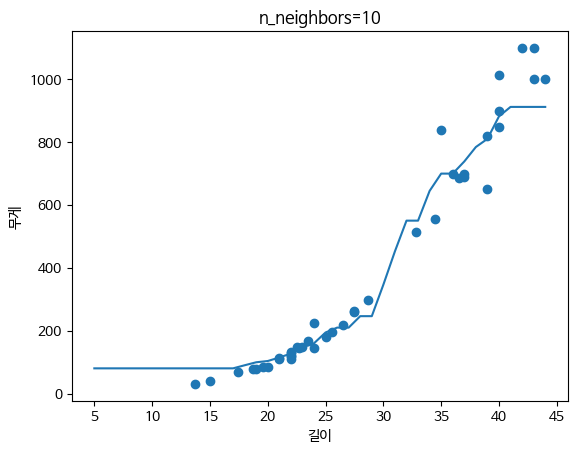

In [26]:
# 앞으로 훈련할 때 하이퍼파라미터 (5>>3 : 매개변수값) 변경으로 좋은 결과를 결정할 때 필수가 됐어요.
# 이것을 보고서에 남겨서 선택한 결과를 표출해야해요.
# 그런데 이것을 사람이 값을 수동으로 바꿔가면서 훈련시키면 시간낭비가 될수 있으니까
# 파이썬의 for문 등을 많이 사용해요.
# 하이퍼파라미터 값은 대부분 홀수를 사용해요. (짝수인 경우에는 이상하게 답이 잘 안나와)

knr = KNeighborsRegressor() # k-최근접 이웃 회귀 객체를 만들게요.
# 5에서 45까지 x좌표를 만들어요.
x=np.arange(5,45).reshape(-1,1)

# n= 1,3,5,10일 때 예측 결과를 그래프로 그립니다,
for n in [1,3,5,10]:
  #모델 훈련
  knr.n_neighbors=n
  knr.fit(train_input, train_target)
  # 지정한 범위 내에 x에 대한 예측 구하기
  prediction = knr.predict(x)
  # 훈련 세트와 예측결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors={}'.format(n))
  plt.xlabel('길이')
  plt.ylabel('무게')
  plt.show()
